#### 1. [LO 1, LO 2 – 30 Poin] Buatlah model machine learning yang berisi proses pre-processing machine learning, training, dan hasil dari perbadingan 2 algoritma machine learning yaitu Random Forest dan Xgboost. Ambil algoritma terbaik dan simpan dengan menggunakan pickle. Seluruh proses disimpan dengan extension .ipynb

#### Dataset B (Hotel) 
###### a. Booking_ID = Pengenal unik dari tiap pemesanan
###### b. no_of_adults = Jumlah orang dewasa
###### c. no_of_children = Jumlah anak kecil
###### d. no_of_weekend_nights = Jumlah malam akhir pekan (Sabtu atau Minggu) tamu menginap atau memesan untuk menginap di hotel
###### e. no_of_week_nights = Jumlah malam dalam seminggu (Senin hingga Jumat) tamu menginap atau memesan untuk menginap di hotel
###### f. type_of_meal_plan = Jenis paket makanan yang dipesan oleh pelanggan
###### g. required_car_parking_space = Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1- Ya)
###### h. room_type_reserved = Jenis kamar yang dipesan oleh pelanggan. Nilai-nilai tersebut dienkripsi oleh INN Hotels
###### i. lead_time = Jumlah hari antara tanggal pemesanan dan tanggal kedatangan
###### j. arrival_year = Tahun tanggal kedatangan
###### k. arrival_month = Bulan tanggal kedatangan
###### l. arrival_date = Tanggal kedatangan
###### m. market_segment_type = Penunjukan segmen pasar
###### n. repeated_guest = Apakah pelanggan tersebut merupakan tamu yang pernah melakukan booking dan juga menginap? (0 - Tidak, 1- Ya)
###### o. no_of_previous_cancellations = Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini
###### p. no_of_previous_bookings_not_canceled = Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelum pemesanan saat ini
###### q. avg_price_per_room = Harga rata-rata per hari pemesanan; harga kamar bersifat dinamis. (dalam euro)
###### r. no_of_special_requests = Jumlah total permintaan khusus yang dibuat oleh pelanggan (misalnya lantai yang tinggi, pemandangan dari kamar, dan lain-lain.)
###### s. booking_status (target variable) = Flag yang menunjukkan apakah pemesanan dibatalkan atau tidak.

# Loading Necessary Libraries

In [42]:
import pandas as pd #pandas digunakan untuk manipulasi data
import numpy as np #numpy digunakan untuk operasi numerik
import matplotlib.pyplot as plt #matplotlib digunakan untuk visualisasi data
import seaborn as sns #seaborn digunakan untuk visualisasi data yang lebih baik
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler #sklearn digunakan untuk preprocessing data
from sklearn.model_selection import train_test_split #sklearn digunakan untuk membagi data menjadi data latih dan data uji
from sklearn.ensemble import RandomForestClassifier #sklearn digunakan untuk membuat model Random Forest
import xgboost as xgb #xgboost digunakan untuk membuat model XGBoost
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #sklearn digunakan untuk evaluasi model
import pickle #pickle digunakan untuk menyimpan model

##### Pada bagian ini terdapat berbagai macam library yang digunakan untuk membuat model machine learning

# Loading The Dataset

In [43]:
df = pd.read_csv("C:/Users/ben/Documents/BInus punya urusan/tugas/Sem 4/Model Deployment/UTS/Dataset_B_hotel.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


##### Pada bagian ini saya memasukan dataset yang digunakan yaitu dataset B ke dalam IPYNB serta melakukan pengecekan ke 5 baris pertama dan terakhir dalam dataset

# Gathering Information On The Dataset

In [44]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0.0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,34,2017,10,15,Online,0,0,0,NaN,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0.0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0.0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0.0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [45]:
df.tail(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36265,INN36266,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36266,INN36267,2,0,2,2,Meal Plan 1,0.0,Room_Type 2,8,2018,3,4,Online,0,0,0,85.96,1,Canceled
36267,INN36268,2,0,1,0,Not Selected,0.0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,INN36269,1,0,0,3,Meal Plan 1,0.0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled
36269,INN36270,2,2,0,1,Meal Plan 1,0.0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [46]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,35005.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,34643.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.031281,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.447208,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.174079,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.158417,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.275000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [48]:
df[df.duplicated()]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [49]:
df.isnull().sum()

Booking_ID                                 0
no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                        907
required_car_parking_space              1270
room_type_reserved                         0
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
market_segment_type                        0
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                      1632
no_of_special_requests                     0
booking_status                             0
dtype: int64

In [50]:
df[df.isnull().any(axis=1)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
6,INN00007,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,34,2017,10,15,Online,0,0,0,NaN,1,Not_Canceled
10,INN00011,1,0,1,0,NaN,0.0,Room_Type 1,0,2018,9,11,Online,0,0,0,85.03,0,Not_Canceled
17,INN00018,2,0,1,3,Not Selected,NaN,Room_Type 1,1,2017,8,10,Online,0,0,0,96.00,1,Not_Canceled
27,INN00028,1,0,0,2,Meal Plan 1,NaN,Room_Type 4,2,2018,5,19,Aviation,0,0,0,110.00,0,Canceled
66,INN00067,2,0,0,2,Meal Plan 1,NaN,Room_Type 4,179,2018,6,3,Online,0,0,0,97.70,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36192,INN36193,2,0,1,2,Not Selected,NaN,Room_Type 1,42,2018,3,11,Online,0,0,0,71.10,1,Not_Canceled
36205,INN36206,1,0,1,0,Meal Plan 1,0.0,Room_Type 1,39,2018,9,25,Online,0,0,0,NaN,0,Not_Canceled
36222,INN36223,2,0,0,4,NaN,0.0,Room_Type 1,1,2017,8,12,Offline,0,0,0,110.00,0,Not_Canceled
36239,INN36240,3,0,0,1,Meal Plan 1,NaN,Room_Type 4,2,2018,2,27,Online,0,0,0,130.00,0,Not_Canceled


In [51]:
null_count = df.isnull().sum()
null_percent = df.isnull().mean()* 100
data_type = df.dtypes
df_unique = df.nunique()

MisVal = pd.DataFrame({
    'Missing Values': null_count,
    'Percentage': null_percent,
    'Data Type': data_type,
    'Unique Values': df_unique
})

MisVal.sort_values(by = 'Percentage', ascending = False)

,Missing Values,Percentage,Data Type,Unique Values
avg_price_per_room,1632,4.498966,float64,3850
required_car_parking_space,1270,3.501034,float64,2
type_of_meal_plan,907,2.500345,object,4
Booking_ID,0,0.000000,object,36275
arrival_date,0,0.000000,int64,31
no_of_special_requests,0,0.000000,int64,6
no_of_previous_bookings_not_canceled,0,0.000000,int64,59
no_of_previous_cancellations,0,0.000000,int64,9
repeated_guest,0,0.000000,int64,2
market_segment_type,0,0.000000,object,5


##### Pada bagian ini saya mencari hal-hal yang bisa ditemukan pada dataset seperti Persentase Null setiap Feature, Mencari duplicated value, dan melihat data type setiap feature sudah benar apa belum

# Dropping Unnecessary columns

In [52]:
df.drop(columns=['Booking_ID'], inplace=True)

In [53]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


##### Pada bagian ini saya drop column Booking_id karena hanya digunakan sebagai label dan tidak bermanfaat untuk modelling

# Handling Duplicated Values

In [54]:
df[df.duplicated()]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
20,2,0,2,2,Meal Plan 1,0.0,Room_Type 1,99,2017,10,30,Online,0,0,0,65.00,0,Canceled
154,2,0,0,1,Meal Plan 2,0.0,Room_Type 1,55,2018,4,6,Offline,0,0,0,104.00,0,Not_Canceled
272,2,0,1,2,Meal Plan 2,0.0,Room_Type 1,161,2018,3,25,Online,0,0,0,130.00,0,Canceled
301,1,0,0,2,Meal Plan 1,0.0,Room_Type 1,188,2018,6,15,Online,0,0,0,130.00,0,Canceled
319,2,0,0,2,Meal Plan 2,0.0,Room_Type 1,320,2018,8,18,Online,0,0,0,115.00,1,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36261,1,0,2,4,Meal Plan 1,0.0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
36263,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,116,2018,2,28,Online,0,0,0,1.00,0,Not_Canceled
36267,2,0,1,0,Not Selected,0.0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,1,0,0,3,Meal Plan 1,0.0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled


#### Karena Duplicated value tersebut hanya memiliki kesamaan di categorical feature tertentu, maka tidak perlu menghapus duplicated data.

# Handling Missing Values

In [55]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].fillna(df['type_of_meal_plan'].mode()[0])
df['required_car_parking_space'] = df['required_car_parking_space'].fillna(0)
df['avg_price_per_room'] = df['avg_price_per_room'].fillna(df['avg_price_per_room'].median())

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  float64
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [57]:
null_count = df.isnull().sum()
null_percent = df.isnull().mean()*100
data_type = df.dtypes
df_unique = df.nunique()

MisVal = pd.DataFrame({
    'Missing Values': null_count,
    'Percentage': null_percent,
    'Data Type': data_type,
    'Unique Values': df_unique
})

MisVal.sort_values(by = 'Percentage', ascending = False)

,Missing Values,Percentage,Data Type,Unique Values
no_of_adults,0,0.0,int64,5
no_of_children,0,0.0,int64,6
no_of_special_requests,0,0.0,int64,6
avg_price_per_room,0,0.0,float64,3850
no_of_previous_bookings_not_canceled,0,0.0,int64,59
no_of_previous_cancellations,0,0.0,int64,9
repeated_guest,0,0.0,int64,2
market_segment_type,0,0.0,object,5
arrival_date,0,0.0,int64,31
arrival_month,0,0.0,int64,12


#### Karena missing values pada dataset lebih rendah dari 5% maka saya memutuskan untuk melakukan imputasi kepada dataset

# Visualization

##### Target = Booking Status

In [58]:
numerics = df.select_dtypes(include = ["float64", "int64"]) #Numeric only features

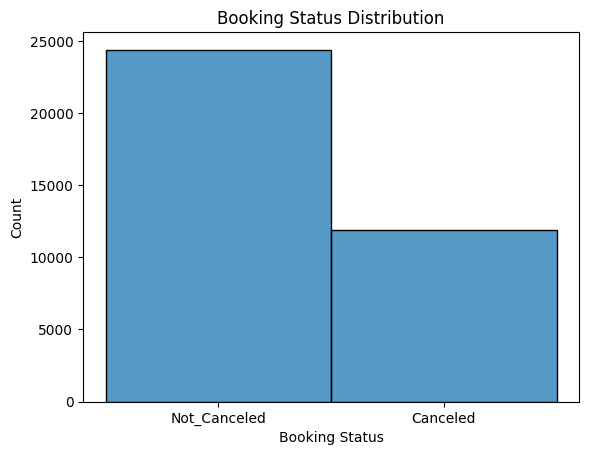

In [59]:
sns.histplot(x='booking_status', data=df)
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.title('Booking Status Distribution')
plt.show()

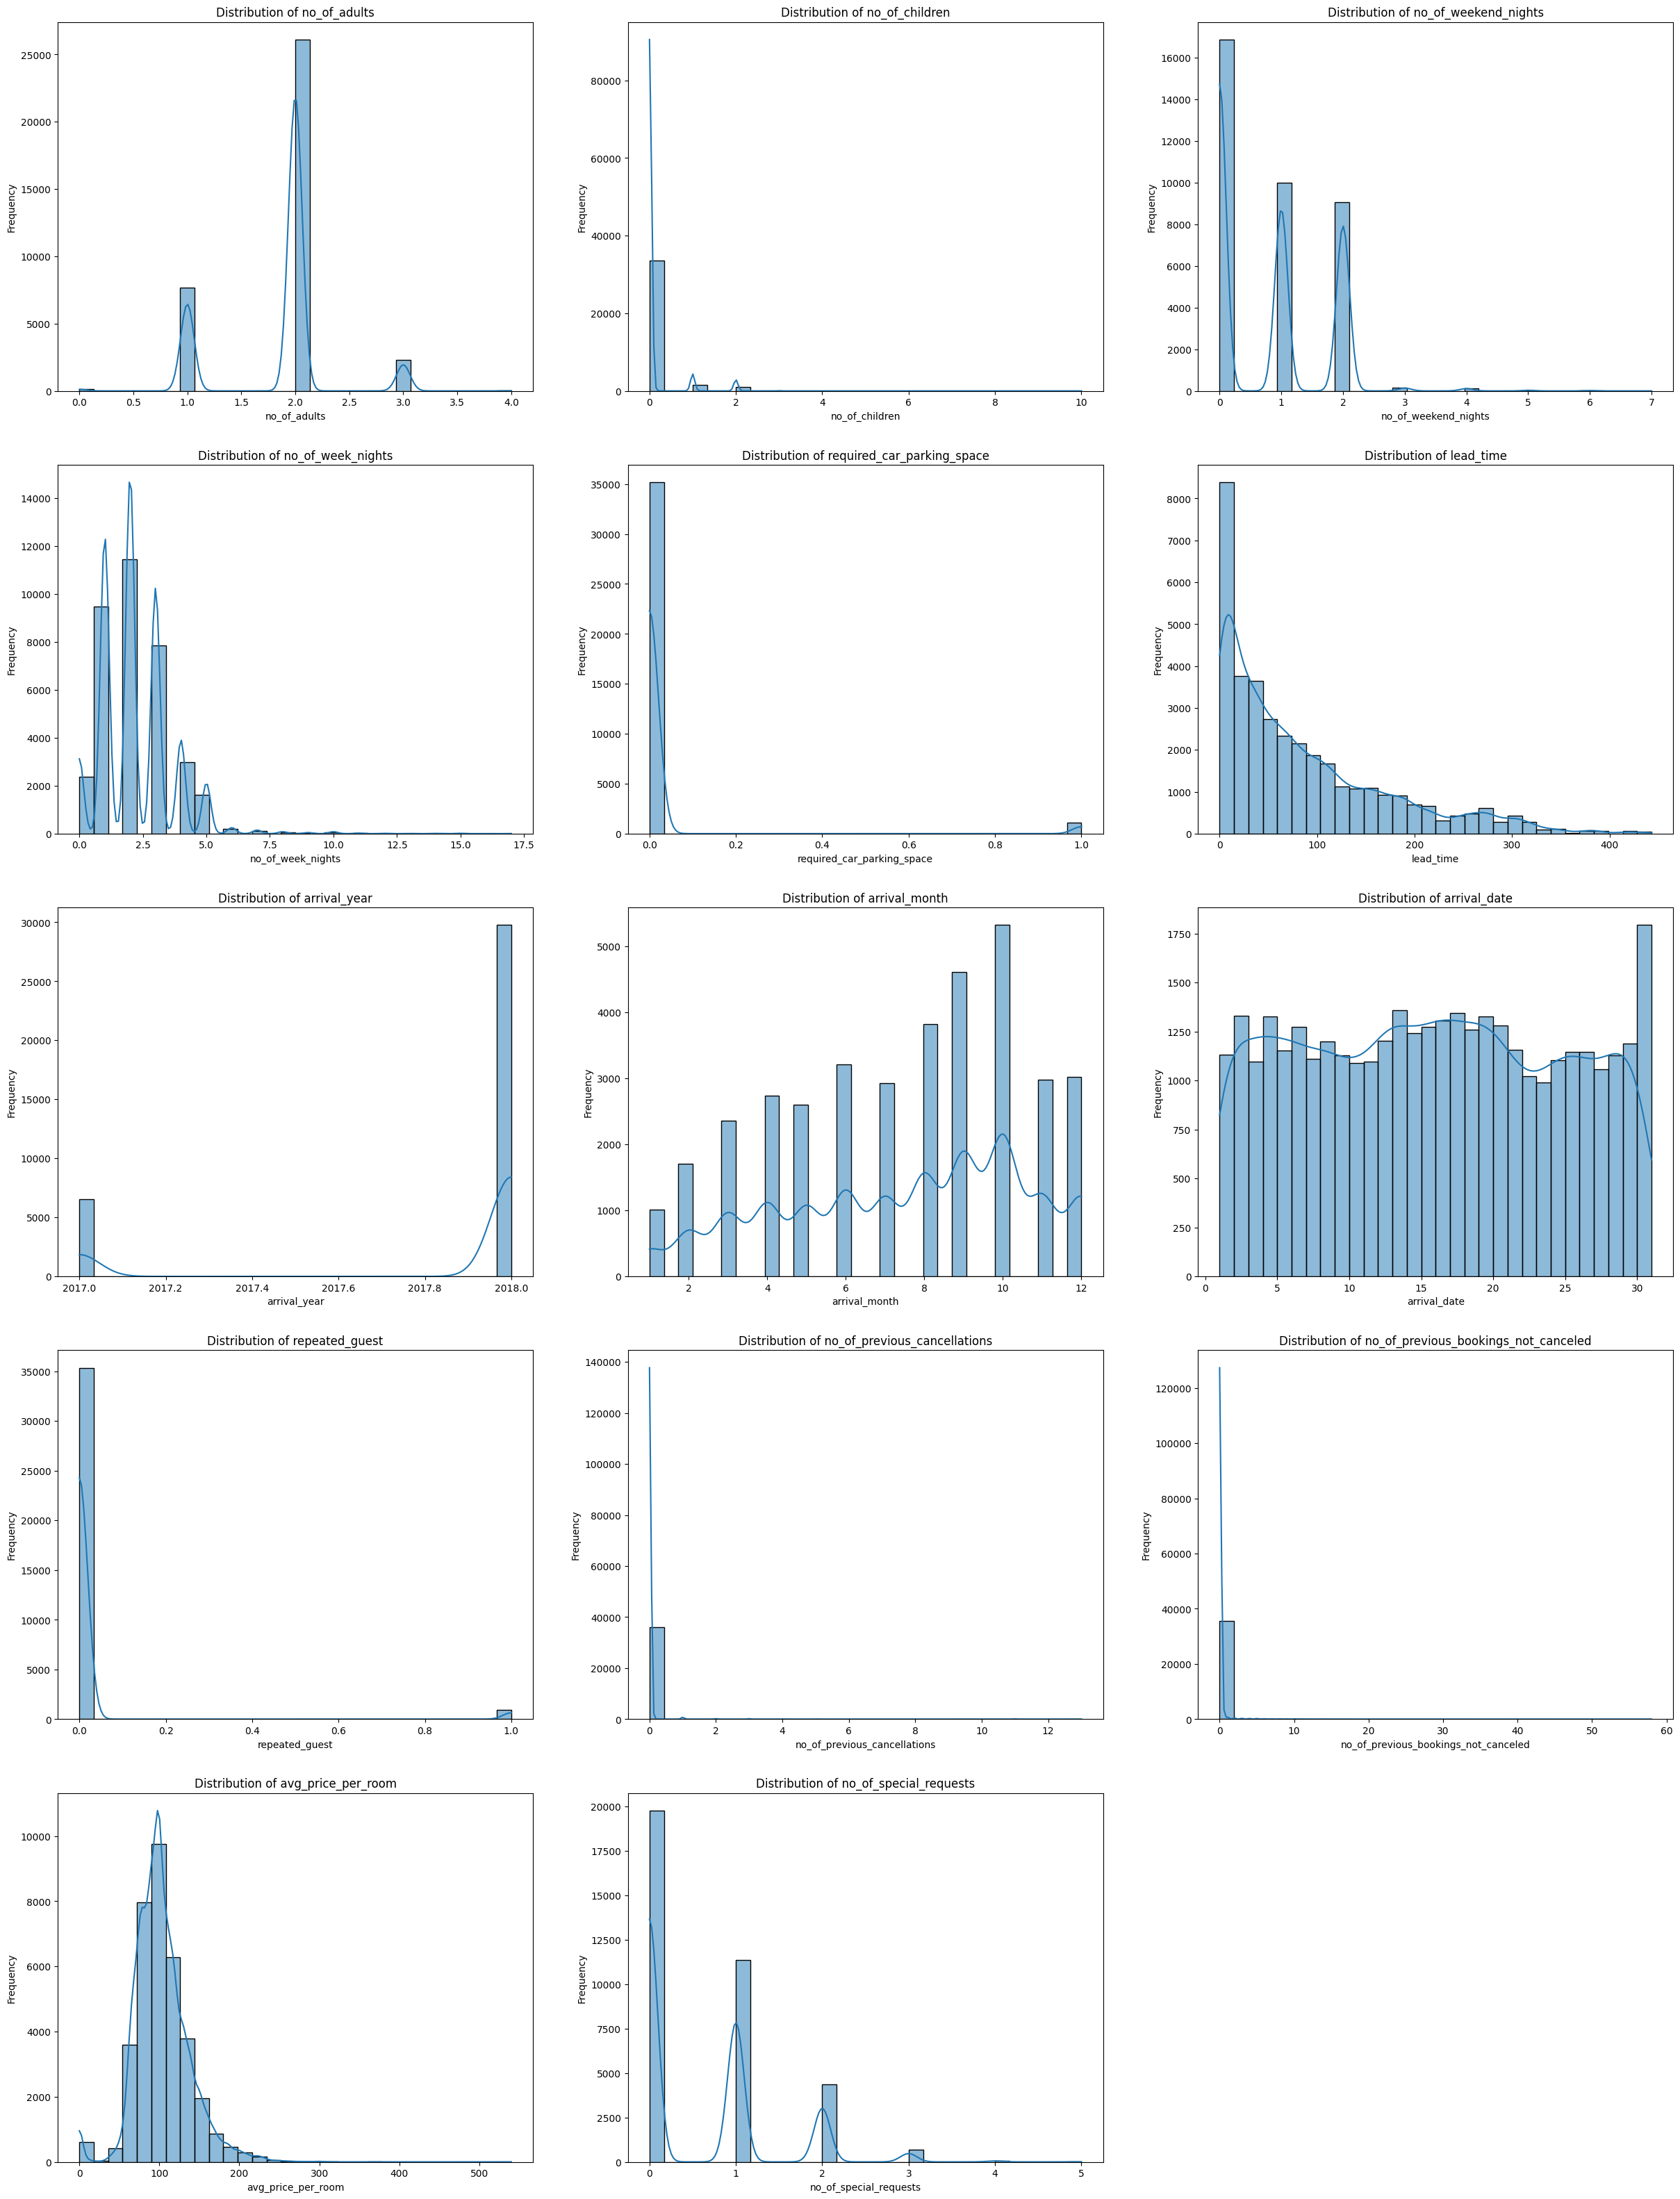

In [60]:
#Distribusi data numerik
n_cols = 3
n_rows = (len(numerics.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 10, n_rows * 8))

for i, col in enumerate(numerics.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.show()

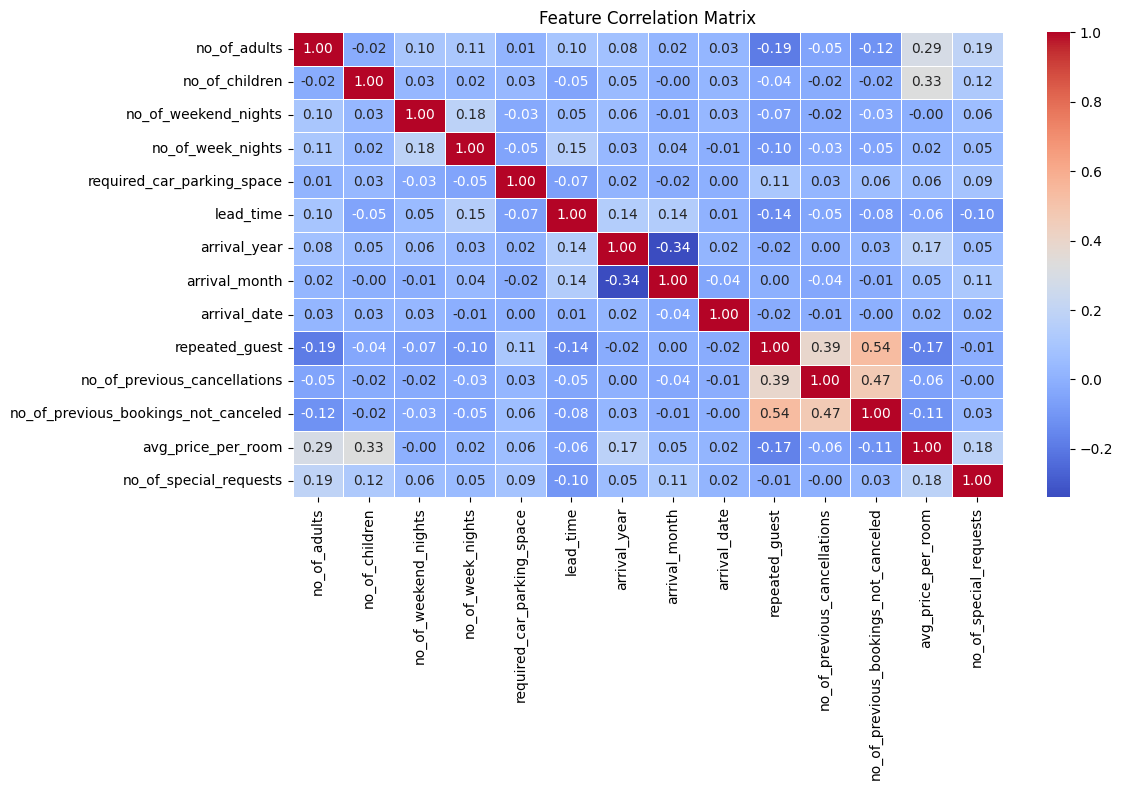

In [61]:
#Korelasi data
plt.figure(figsize=(12,8))
sns.heatmap(numerics.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

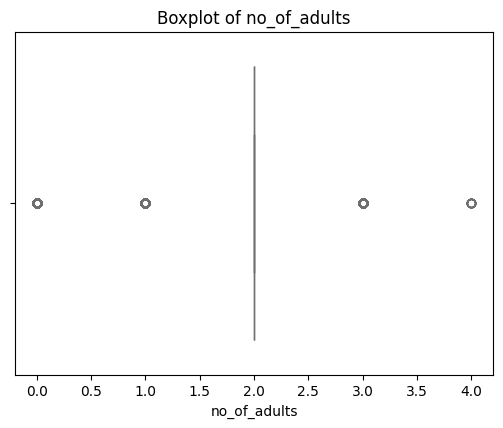

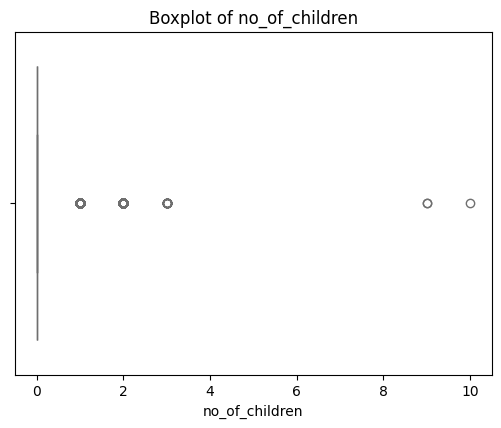

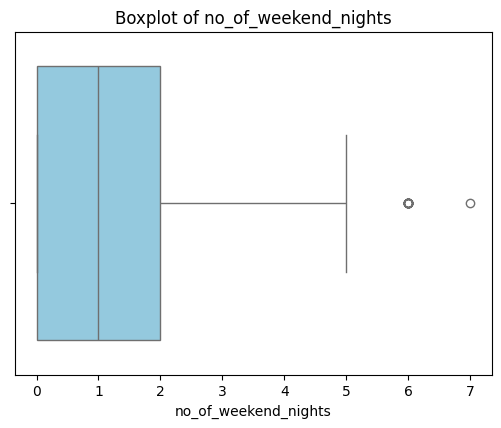

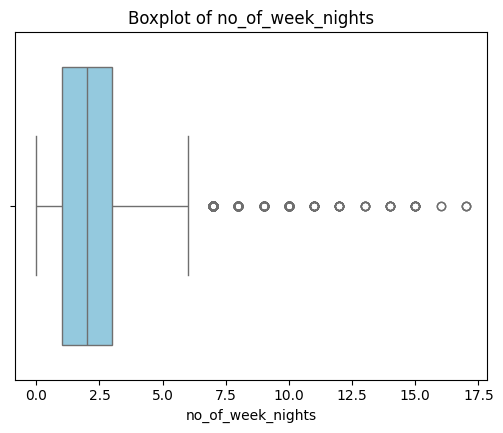

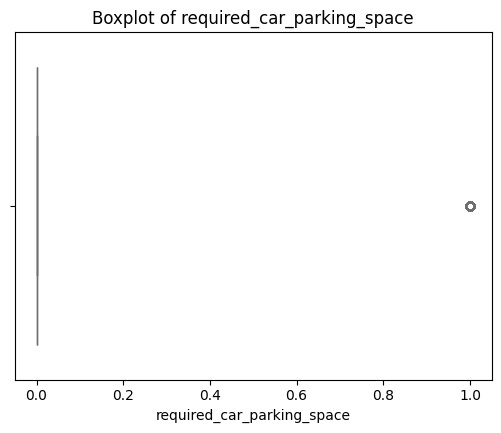

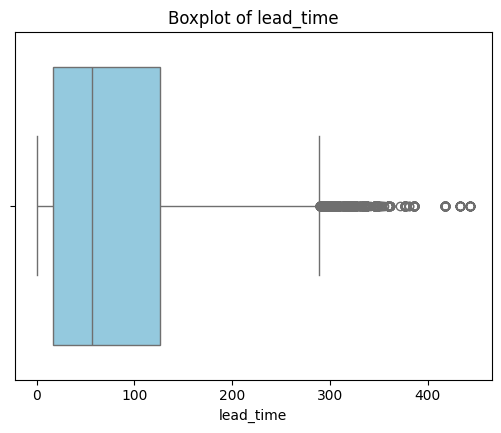

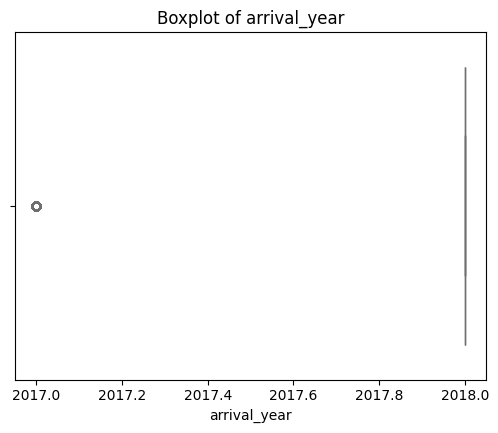

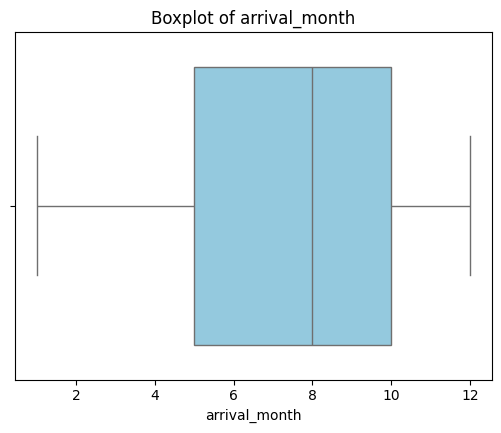

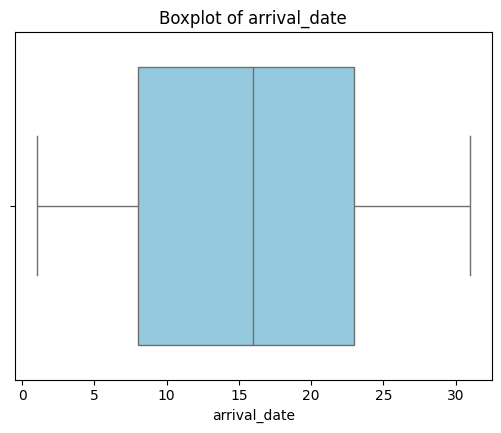

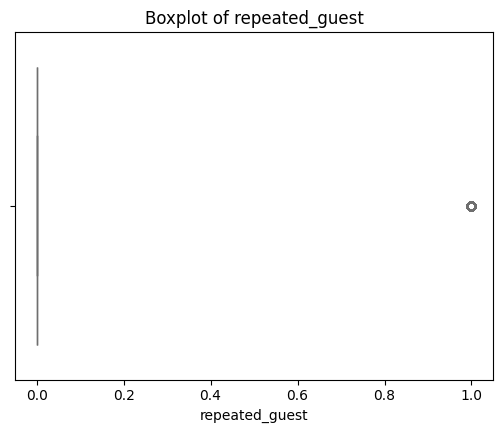

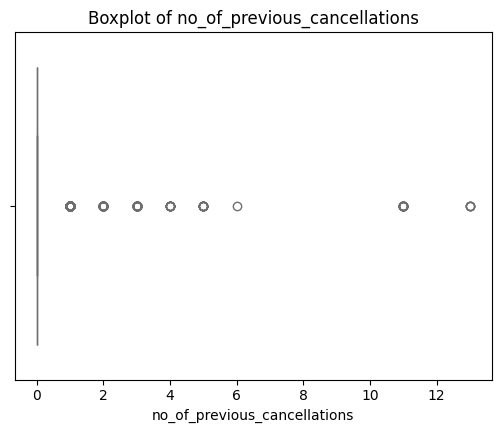

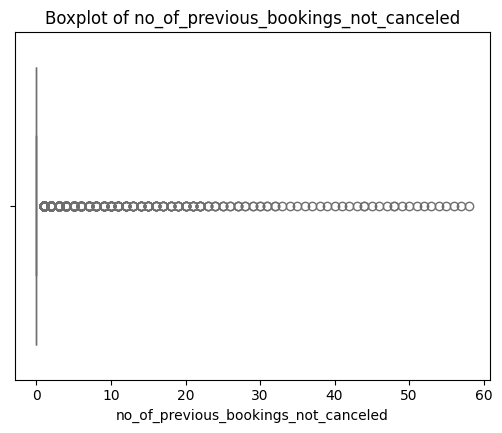

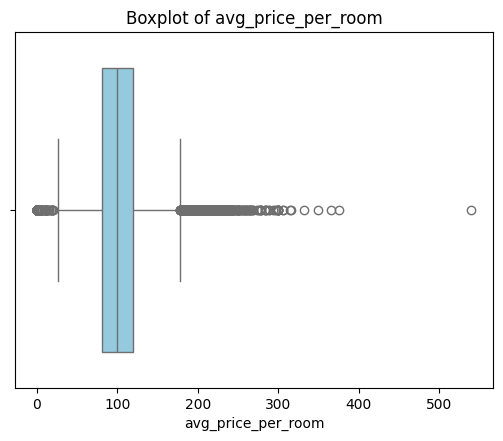

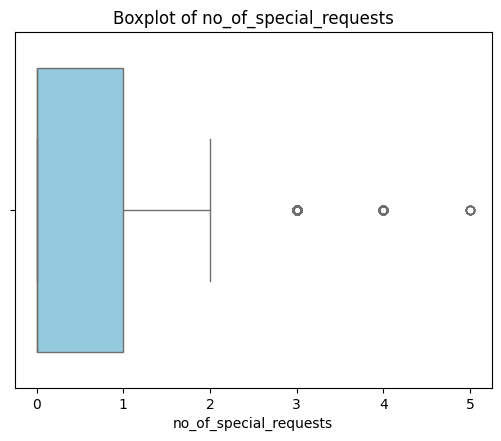

In [62]:
# Loop untuk buat boxplot tiap kolom numerik
for i, col in enumerate(numerics.columns, 1):
    plt.figure(figsize=(n_cols * 5, n_rows * 4))
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

##### Pada bagian ini saya melakukan Visualisasi seperti Histogram untuk mencari distribusi setiap variable, dan boxplot untuk mencari outliers tiap feature

# Data Type Fixing

In [63]:
itg = df.select_dtypes(include = ["int64"]).columns
df[itg] = df[itg].astype('float64')

In [64]:
df[['repeated_guest','required_car_parking_space']] = df[['repeated_guest','required_car_parking_space']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  float64
 1   no_of_children                        36275 non-null  float64
 2   no_of_weekend_nights                  36275 non-null  float64
 3   no_of_week_nights                     36275 non-null  float64
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  float64
 9   arrival_month                         36275 non-null  float64
 10  arrival_date                          36275 non-null  float64
 11  market_segment_

##### Mengubah integer menjadi float agar saat modelling data numerical menjadi lebih akurat

# Encoding Catgorical Varibles

In [65]:
encoder = OneHotEncoder(sparse_output=False)
df_encoded = encoder.fit_transform(df[['type_of_meal_plan','room_type_reserved','market_segment_type']]) #using OneHotEncoder
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(['type_of_meal_plan','room_type_reserved','market_segment_type']))
df_encoded

df_encoded = pd.concat([df.drop(['type_of_meal_plan','room_type_reserved','market_segment_type'], axis=1), df_encoded], axis=1) #Merger the encoded dataset with the original dataset
df_encoded

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2.0,0.0,1.0,2.0,0,224.0,2017.0,10.0,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,0.0,2.0,3.0,0,5.0,2018.0,11.0,6.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,2.0,1.0,0,1.0,2018.0,2.0,28.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,0.0,0.0,2.0,0,211.0,2018.0,5.0,20.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,0.0,1.0,1.0,0,48.0,2018.0,4.0,11.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3.0,0.0,2.0,6.0,0,85.0,2018.0,8.0,3.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36271,2.0,0.0,1.0,3.0,0,228.0,2018.0,10.0,17.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36272,2.0,0.0,2.0,6.0,0,148.0,2018.0,7.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36273,2.0,0.0,0.0,3.0,0,63.0,2018.0,4.0,21.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  float64
 1   no_of_children                        36275 non-null  float64
 2   no_of_weekend_nights                  36275 non-null  float64
 3   no_of_week_nights                     36275 non-null  float64
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  float64
 6   arrival_year                          36275 non-null  float64
 7   arrival_month                         36275 non-null  float64
 8   arrival_date                          36275 non-null  float64
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  float64
 11  no_of_previous_

##### Melakukan encoding kepada categorical values dengan menggunakan OneHotEncoding agar value dengan tipe object menjadi angka tapi tetap mempertahankan data typenya.

# Scaling Numerical Values

In [67]:
scaler = StandardScaler() #Using Standard scaling
nums_scaled = scaler.fit_transform(df_encoded[["no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights", "lead_time", "arrival_year", "arrival_month", "arrival_date", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "avg_price_per_room", "no_of_special_requests"]])
df_scaled = pd.DataFrame(nums_scaled, columns=["no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights", "lead_time", "arrival_year", "arrival_month", "arrival_date", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "avg_price_per_room", "no_of_special_requests"]) #Scaled dataset
df_scaled

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.298893,-0.26147,0.217401,-0.144803,1.614896,-2.137469,0.839242,-1.555662,-0.063393,-0.087456,-1.113462,-0.788140
1,0.298893,-0.26147,1.365993,0.563972,-0.933701,0.467843,1.164990,-1.098013,-0.063393,-0.087456,0.099297,0.483760
2,-1.628975,-0.26147,1.365993,-0.853578,-0.980250,0.467843,-1.766747,1.419055,-0.063393,-0.087456,-1.258946,-0.788140
3,0.298893,-0.26147,-0.931190,-0.144803,1.463610,0.467843,-0.789501,0.503757,-0.063393,-0.087456,-0.095070,-0.788140
4,0.298893,-0.26147,0.217401,-0.853578,-0.433291,0.467843,-1.115250,-0.525952,-0.063393,-0.087456,-0.255103,-0.788140
...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.226761,-0.26147,1.365993,2.690296,-0.002706,0.467843,0.187744,-1.441250,-0.063393,-0.087456,1.877699,0.483760
36271,0.298893,-0.26147,0.217401,0.563972,1.661446,0.467843,0.839242,0.160521,-0.063393,-0.087456,-0.358397,1.755661
36272,0.298893,-0.26147,1.365993,2.690296,0.730452,0.467843,-0.138004,-1.670074,-0.063393,-0.087456,-0.141916,1.755661
36273,0.298893,-0.26147,-0.931190,0.563972,-0.258730,0.467843,-1.115250,0.618170,-0.063393,-0.087456,-0.255103,-0.788140


In [68]:
df_scaled.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

##### Melakukan Scaling terhadap numerikal value agar menjadi lebih optimal saat modelling

# Encoded and Scaled Dataset

In [69]:
clean_df = pd.concat([df_scaled,df_encoded.drop(["no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights", "lead_time", "arrival_year", "arrival_month", "arrival_date", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "avg_price_per_room", "no_of_special_requests"], axis = 1)], axis=1) #Merging the encoded dataset and the scaled dataset to be a new dataset
clean_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.298893,-0.26147,0.217401,-0.144803,1.614896,-2.137469,0.839242,-1.555662,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.298893,-0.26147,1.365993,0.563972,-0.933701,0.467843,1.164990,-1.098013,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.628975,-0.26147,1.365993,-0.853578,-0.980250,0.467843,-1.766747,1.419055,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.298893,-0.26147,-0.931190,-0.144803,1.463610,0.467843,-0.789501,0.503757,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.298893,-0.26147,0.217401,-0.853578,-0.433291,0.467843,-1.115250,-0.525952,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.226761,-0.26147,1.365993,2.690296,-0.002706,0.467843,0.187744,-1.441250,-0.063393,-0.087456,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36271,0.298893,-0.26147,0.217401,0.563972,1.661446,0.467843,0.839242,0.160521,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36272,0.298893,-0.26147,1.365993,2.690296,0.730452,0.467843,-0.138004,-1.670074,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36273,0.298893,-0.26147,-0.931190,0.563972,-0.258730,0.467843,-1.115250,0.618170,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
clean_df.dropna(inplace=True) 
clean_df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
required_car_parking_space              0
repeated_guest                          0
booking_status                          0
type_of_meal_plan_Meal Plan 1           0
type_of_meal_plan_Meal Plan 2           0
type_of_meal_plan_Meal Plan 3           0
type_of_meal_plan_Not Selected          0
room_type_reserved_Room_Type 1          0
room_type_reserved_Room_Type 2          0
room_type_reserved_Room_Type 3          0
room_type_reserved_Room_Type 4          0
room_type_reserved_Room_Type 5    

In [71]:
clean_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.298893,-0.26147,0.217401,-0.144803,1.614896,-2.137469,0.839242,-1.555662,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.298893,-0.26147,1.365993,0.563972,-0.933701,0.467843,1.164990,-1.098013,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.628975,-0.26147,1.365993,-0.853578,-0.980250,0.467843,-1.766747,1.419055,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.298893,-0.26147,-0.931190,-0.144803,1.463610,0.467843,-0.789501,0.503757,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.298893,-0.26147,0.217401,-0.853578,-0.433291,0.467843,-1.115250,-0.525952,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.226761,-0.26147,1.365993,2.690296,-0.002706,0.467843,0.187744,-1.441250,-0.063393,-0.087456,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36271,0.298893,-0.26147,0.217401,0.563972,1.661446,0.467843,0.839242,0.160521,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36272,0.298893,-0.26147,1.365993,2.690296,0.730452,0.467843,-0.138004,-1.670074,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36273,0.298893,-0.26147,-0.931190,0.563972,-0.258730,0.467843,-1.115250,0.618170,-0.063393,-0.087456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##### Menggabungkan dataset yang telah di scale dan di encode menjadi dataset baru yang akan digunakan untuk modelling

# Data Train and Modeling

In [72]:
X = clean_df.drop(columns='booking_status')
Y = clean_df['booking_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [73]:
Rand_for = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10
)
Rand_for.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [74]:
Y_Rand_for_pred = Rand_for.predict(X_test)

In [75]:
accuracy = accuracy_score(Y_test, Y_Rand_for_pred) #function dari sklearn yang digunakan untuk mengetahui keakuratan model yang dilatih
classification = classification_report(Y_test, Y_Rand_for_pred) #function dari sklearn yang digunakan untuk membuat report mengenai model yang dilatih
confusion = confusion_matrix(Y_test, Y_Rand_for_pred) #function dari sklearn yang digunakan untuk menghitung confusion matrix dari model yang dilatih

In [76]:
print("Accuracy: ", accuracy)
print("Classification Report: \n", classification)
print("Confusion Matrix: \n", confusion)

Accuracy:  0.8660234321157823
Classification Report: 
               precision    recall  f1-score   support

    Canceled       0.85      0.72      0.78      2416
Not_Canceled       0.87      0.94      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.86      0.83      0.84      7255
weighted avg       0.87      0.87      0.86      7255

Confusion Matrix: 
 [[1742  674]
 [ 298 4541]]


In [77]:
# Buat encoder
encoders = LabelEncoder()

# Ubah Y_train dan Y_test ke bentuk numerik
Y_train_encoded = encoders.fit_transform(Y_train)
Y_test_encoded = encoders.transform(Y_test)

In [78]:
XG_Boost = xgb.XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

XG_Boost.fit(X_train, Y_train_encoded)

c:\Users\ben\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:43:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [79]:
preds = XG_Boost.predict(X_test)

XG_accuracy = accuracy_score(Y_test_encoded, preds) #function dari sklearn yang digunakan untuk mengetahui keakuratan model yang dilatih
XG_classification = classification_report(Y_test_encoded, preds) #function dari sklearn yang digunakan untuk membuat report mengenai model yang dilatih
XG_confusion = confusion_matrix(Y_test_encoded, preds) #function dari sklearn yang digunakan untuk menghitung confusion matrix dari model yang dilatih

In [80]:
print("Accuracy: ", XG_accuracy)
print("Classification Report: \n", XG_classification)
print("Confusion Matrix: \n", XG_confusion)

Accuracy:  0.8887663680220538
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.79      0.83      2416
           1       0.90      0.94      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255

Confusion Matrix: 
 [[1920  496]
 [ 311 4528]]


##### Menggunakan dataset yang telah di pre-processed dan memasukannya ke dalam model random forest serta XGbost dan dapat dilihat model XGboost lebih unggul

# Saving to Pickle

In [83]:
# Simpan model terlebih dahulu
with open("XGBoost_best_model.pkl", "wb") as file:
    pickle.dump(XG_Boost, file)

with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('clean_df.pkl', 'wb') as f:
    pickle.dump(clean_df, f)

##### Save model dengan akurasi lebih tinggi, pada kasus ini XGboost kedalam pickle